In [1]:
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import importlib.util
import numpy as np 
import seaborn as sns
import pickle
import scipy.stats as stats
from scipy.optimize import curve_fit

In [2]:
# coe_above015 and coe_above015_noage are two parameters indicative of the selected 50 cytosines noise barometers

In [5]:
anor = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/excels for submit/50_anor.xlsx', 'Sheet1')
# anor = anor.set_index('Unnamed: 1').iloc[:,1:]
anor_ad = abs(anor.sub(anor.mean()))[coe_above015_noage]
anor_ad['age'] = anor['Age']
anor_ad = anor_ad[anor_ad['age']>24]

anor_above27 = anor_ad[anor_ad['age']>27]
anor_noage27= anor_above27.iloc[:,:-1]


/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_56866/3172621363.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anor_ad = abs(anor.sub(anor.mean()))[coe_above015_noage]


In [7]:
def poly_6(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g
def poly_5(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f 


( 1.7808725425076026e-07  * x) + ( -4.457870853656237e-05 * x**2) + ( 0.004382243553026213  * x**3) +  ( -0.21092332083521262  * x**4) + ( 4.9699561634749045  * x**5) + ( -45.21251243206599 )


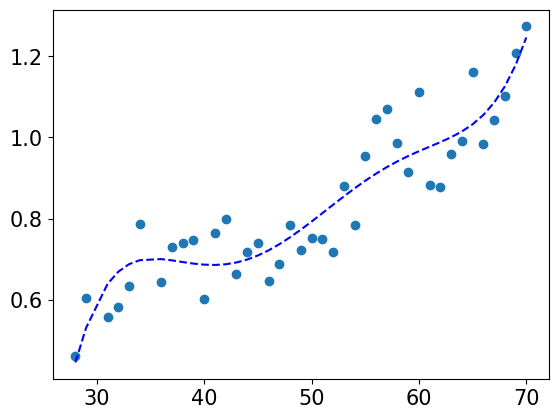

In [9]:
# right figure of fitting for healthy arthritis
each_age_median = (anor_above27.sort_values(by='age').set_index('age').sum(axis=1)/1.8567583938236492).to_frame().reset_index().groupby('age').median()
plt.scatter(each_age_median.reset_index()['age'], each_age_median.iloc[:,0])
popt, _ = curve_fit(poly_5,  each_age_median.reset_index()['age'], each_age_median[0])
a, b, c, d, e, f = popt
x_lineanor = each_age_median.reset_index()['age']
# calculate the output for the range
y_lineanor = poly_5(each_age_median.reset_index()['age'],                 
                        a, b, c, d, e, f)
plt.plot(x_lineanor, y_lineanor, '--', color='blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
print('(',a,' * x) + (',b, '* x**2) + (',c,' * x**3) + ','(',d,' * x**4) + (',e,' * x**5) + (',f,')')

plt.show()


In [119]:
# Sum of SD converted 
from scipy.optimize import fsolve
for i in [0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.4]:
    poly = [1.7809424560838202e-07, -4.458046086946514e-05, 0.004382415360210077, -0.21093154620997262, 4.970148221562801, -45.21425999901509 -i]
    f = np.roots(poly)
    real_valued = f.real[abs(f.imag)<1e-5] # where I chose 1-e5 as a threshold
# print(real_valued)
    print(real_valued)
#     pred_nor.append(fsolve(f, [1])[0])
# pred_nor

[27.56117129]
[28.59955787]
[30.10441547]
[44.08649662 36.16000548 34.48425513]
[50.35348185]
[55.37443807]
[62.95642349]
[67.39274491]
[69.35110123]
[71.62979088]


In [112]:
import pickle
arth = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/rheumatoid_arthritis.pickle', "rb"))

import scipy.stats as stats
arth_zscore = stats.zscore(arth.iloc[:,:-1], axis=0) 
arth_ad = arth_zscore * arth.std()
arth_ad = arth_ad.abs()
arth_ad['age'] = arth['age']

df_above27 = arth_ad[arth_ad['age']>27]
# df_above27 = arth_ad
df_noage27= df_above27.iloc[:,:-1]
df27_remove = df_above27[df_above27.columns.intersection(coe_above015)]


In [107]:
def square(list):
    return [i ** 2 for i in list]

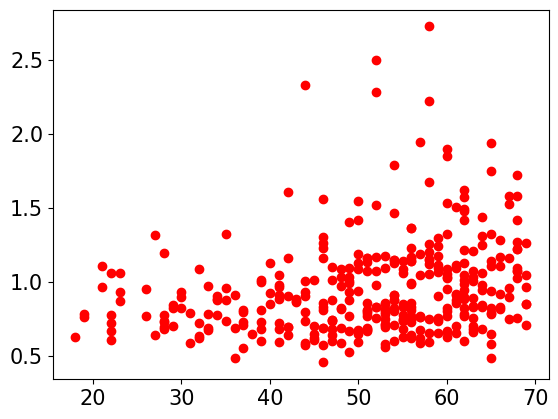

In [7]:
plt.scatter(df_above27[coe_above015].sort_values(by='age')['age'],
            df_above27[coe_above015].sort_values(by='age').iloc[
    :,:-1].sum(axis=1)/1.8567583938236492, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [8]:
Mean_25 = 1.8567583938236492
# the average summed SD from the 50 selected cytosines (noise barometers) for 25 to 28-year-old individuals 

In [114]:
test_arthdf = (df_above27[coe_above015].sort_values(by='age').drop(columns='age').sum(axis=1)/
               1.8567583938236492).to_frame()
test_arthdf['age'] = df_above27[coe_above015].sort_values(by='age')['age']
test_arthdf

,0,age
266,1.195254,28.0
122,0.681738,28.0
342,0.727666,28.0
187,0.693650,28.0
309,0.777831,28.0
...,...,...
182,0.850613,69.0
15,0.707904,69.0
87,0.962864,69.0
268,1.044961,69.0


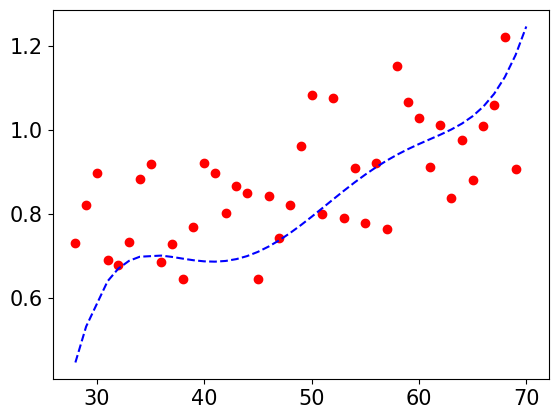

In [125]:
test_med = (df_above27[coe_above015].sort_values(by='age').set_index('age').sum(axis=1)/1.8567583938236492).to_frame().reset_index().groupby('age').median()
plt.scatter(test_med.reset_index()['age'], test_med.iloc[:,0], color='red')
plt.plot(x_lineanor, y_lineanor, '--', color='blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# customize the number of ticks on y axis 
plt.locator_params(axis='y', nbins=5)
plt.show()

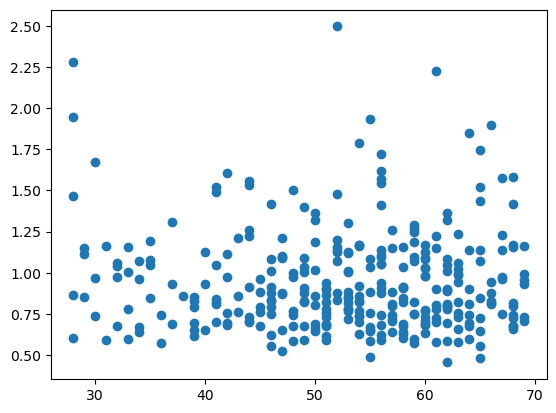

In [24]:
test_all = SUM_Nor_df.set_index('key_0').sort_values(by='age').dropna(axis=0)
plt.scatter(test_all['age'], test_all['values'])